# look at celerity prior to SUMOS campaign


Search for floats in the Bay of Biscay

[argo website](https://fleetmonitoring.euro-argo.eu/dashboard)

[argopy doc](https://argopy.readthedocs.io/en/latest/index.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from argopy import DataFetcher as ArgoDataFetcher
import gsw

/Users/aponte/.miniconda3/envs/cognac/lib/python3.8/site-packages/argopy/plotters.py:41: UserWarning: argopy requires seaborn installed for full plotting functionality
  warnings.warn("argopy requires seaborn installed for full plotting functionality")


In [2]:
region = [-10, -2, 44, 48]
pressure = [0, 3000]
dates = ['2020', '2022']
ds = ArgoDataFetcher().region(region+pressure+dates).to_xarray()
ds = ds.argo.point2profile()

ds.argo.teos10(['SA', 'CT'])
ds['sound_speed'] = (('N_PROF','N_LEVELS'),gsw.sound_speed(ds.SA, ds.CT, ds.PRES))

ds

<xarray.Dataset>
Dimensions:                (N_LEVELS: 415, N_PROF: 72)
Coordinates:
  * N_PROF                 (N_PROF) int64 10 11 12 13 14 15 ... 30 53 43 71 31
    LATITUDE               (N_PROF) float64 46.49 46.36 46.22 ... 45.58 47.27
    LONGITUDE              (N_PROF) float64 -8.188 -8.13 -8.022 ... -9.393 -8.75
    TIME                   (N_PROF) datetime64[ns] 2020-01-09T16:43:00 ... 20...
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 410 411 412 413 414
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int64 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    CYCLE_NUMBER           (N_PROF) int64 8 9 10 11 12 13 ... 22 46 22 20 23 47
    DATA_MODE              (N_PROF) <U1 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int64 6902840 6902840 ... 7900573 6902840
    POSITION_QC            (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                   (N_PROF, N_LEVELS) float64 3.0 4.0 5.0 ... nan nan
    PRES_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_PROF, N_LEVELS) float64 35.55 35.55 ... nan nan
    PSAL_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_PROF, N_LEVELS) float64 12.39 12.39 ... nan nan
    TEMP_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    CT                     (N_PROF, N_LEVELS) float64 12.37 12.37 ... nan nan
    SA                     (N_PROF, N_LEVELS) float64 35.72 35.72 ... nan nan
    sound_speed            (N_PROF, N_LEVELS) float64 1.499e+03 ... nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           aponte
    Fetched_date:         2021/02/06
    Fetched_constraints:  [x=-10.00/-2.00; y=44.00/48.00; z=0.0/3000.0; t=202...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [3]:
ds_last = ds.TIME.groupby(ds.PLATFORM_NUMBER).max()
last_date = {f: ds_last.sel(PLATFORM_NUMBER=f).dt.strftime('%Y-%m-%d').values
             for f in ds_last.PLATFORM_NUMBER.values
            }
last_date

{6902839: array('2020-09-01', dtype=object),
 6902840: array('2021-02-02', dtype=object),
 7900558: array('2021-01-29', dtype=object),
 7900570: array('2021-01-28', dtype=object),
 7900573: array('2021-02-02', dtype=object)}

In [4]:
# print platform numbers
floats = set(ds.PLATFORM_NUMBER.values)
print(floats)

{7900558, 6902839, 6902840, 7900570, 7900573}


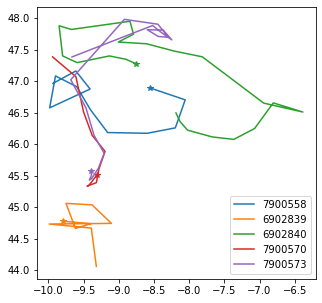

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
for f in floats:
    _ds = ds.where(ds.PLATFORM_NUMBER==f, drop=True)
    hdl = ax.plot(_ds.LONGITUDE, _ds.LATITUDE, label=str(f))
    ax.plot(_ds.LONGITUDE[-1], _ds.LATITUDE[-1], 
            color = hdl[0].get_c(), 
            marker='*',
           )
ax.legend()

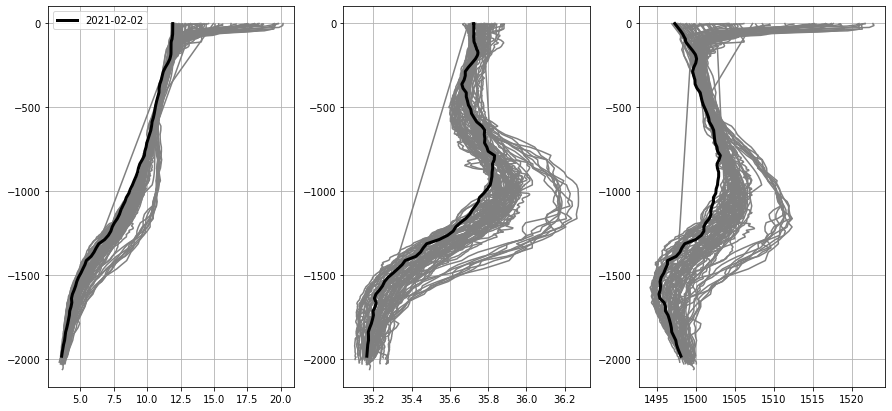

In [6]:
#f = 7900558
f = 6902840
ds_float = ds.where(ds.PLATFORM_NUMBER==f, drop=True)
ds_last = ds_float.isel(N_PROF=-1)
date = ds_last.TIME.dt.strftime('%Y-%m-%d').values

fig, axes = plt.subplots(1, 3, figsize=(15,7))

z = -ds.PRES

ax=axes[0]
ax.plot(ds.CT.T, z.T, color='0.5')
ax.plot(ds_last.CT.T, -ds_last.PRES, color='k',lw=3, label=date)
ax.legend()
ax.grid()

ax=axes[1]
ax.plot(ds.SA.T, z.T, color='0.5')
ax.plot(ds_last.SA.T, -ds_last.PRES, color='k',lw=3, label=date)
ax.grid()

ax=axes[2]
ax.plot(ds.sound_speed.T, z.T, color='0.5')
ax.plot(ds_last.sound_speed.T, -ds_last.PRES, color='k',lw=3)
ax.grid()

#ds_float

In [7]:
df = ds_last.to_dataframe()
data_dir = '/Users/aponte/Current_projects/cognac/campagnes/2021_sumos/'
df.to_csv(data_dir+'sumos_{:d}.csv'.format(f))

---
### argopy / debug

In [8]:
#float number
ds = ArgoDataFetcher().float(6902746).to_xarray()
#float + profile number
ds = ArgoDataFetcher().profile(6902755, 12).to_xarray()

In [ ]:
import argopy
argopy.show_versions()